# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [178]:
# Loading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [179]:
train_original = train.copy()
predict_original = predict.copy()

In [180]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [181]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [183]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [184]:
train = train.drop(['Loan_ID'], axis=1)
predict = predict.drop(['Loan_ID'], axis=1)

In [185]:
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(float)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Gender'] = train['Gender'].astype('category').cat.codes
train['Married'] = train['Married'].astype('category').cat.codes
train['Self_Employed'] = train['Self_Employed'].astype('category').cat.codes

In [186]:
predict['Dependents'] = predict['Dependents'].replace('3+', 3).astype(float)
predict['Gender'] = predict['Gender'].astype('category').cat.codes
predict['Married'] = predict['Married'].astype('category').cat.codes
predict['Self_Employed'] = predict['Self_Employed'].astype('category').cat.codes

# Data Cleaning¶

In [187]:
train.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int8   
 1   Married            614 non-null    int8   
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), int8(3), object(2)
memory usage: 45.1+ KB


In [189]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int8   
 1   Married            367 non-null    int8   
 2   Dependents         357 non-null    float64
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    int8   
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), int8(3), object(2)
memory usage: 24.1+ KB


# KNN imputation

In [190]:
# We impute missing values with KNN model
from sklearn.impute import KNNImputer

In [191]:
train.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [192]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to the numerical columns
train[numerical_columns] = imputer.fit_transform(train[numerical_columns])

In [193]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,Graduate,0,5849.0,0.0,138.0,360.0,1.0,Urban,1.0
1,1,1,1.0,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
2,1,1,0.0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
3,1,1,0.0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
4,1,0,0.0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,Graduate,0,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
610,1,1,3.0,Graduate,0,4106.0,0.0,40.0,180.0,1.0,Rural,1.0
611,1,1,1.0,Graduate,0,8072.0,240.0,253.0,360.0,1.0,Urban,1.0
612,1,1,2.0,Graduate,0,7583.0,0.0,187.0,360.0,1.0,Urban,1.0


In [194]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [195]:
predict.isnull().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [196]:
numerical_columns = predict.select_dtypes(include=['float64', 'int64']).columns

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to the numerical columns
predict[numerical_columns] = imputer.fit_transform(predict[numerical_columns])


In [197]:
predict.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Model Building

In [198]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

# one hot encoding

In [199]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
predict = pd.get_dummies(predict)

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# desision tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [203]:
dtmodel = DecisionTreeClassifier()

In [204]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16]
}
grid_search = GridSearchCV(estimator=dtmodel, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 12,
 'min_samples_split': 5,
 'splitter': 'random'}

In [205]:
best_params = grid_search.best_params_
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=12, min_samples_split=5,
                       splitter='random')

In [206]:
predictions = best_model.predict(X_test)

In [207]:
from sklearn.metrics import accuracy_score, classification_report

In [208]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.50      0.64        58
         1.0       0.81      0.98      0.89       127

    accuracy                           0.83       185
   macro avg       0.86      0.74      0.77       185
weighted avg       0.84      0.83      0.81       185



In [209]:
print(accuracy_score(y_test, predictions))

0.827027027027027


In [210]:
feature_importances_dt = best_model.feature_importances_
feature_importances_dt

array([1.58500990e-03, 2.18842311e-02, 1.99605407e-02, 1.05032945e-02,
       2.07822685e-02, 2.59181157e-02, 5.17422948e-02, 0.00000000e+00,
       7.89571646e-01, 0.00000000e+00, 1.14801015e-02, 6.91536770e-04,
       3.57613930e-02, 1.01195678e-02])

In [211]:
dtimp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": feature_importances_dt
})
dtimp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,Credit_History,0.789572
6,LoanAmount,0.051742
12,Property_Area_Semiurban,0.035761
5,CoapplicantIncome,0.025918
1,Married,0.021884
4,ApplicantIncome,0.020782
2,Dependents,0.019961
10,Education_Not Graduate,0.011480
3,Self_Employed,0.010503
13,Property_Area_Urban,0.010120


# Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
rfmodel = RandomForestClassifier()

In [214]:
param_grid_rf = {
    'n_estimators': [450, 500, 550, 600, 650],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25]
}
grid_search_rf = GridSearchCV(estimator=rfmodel, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 550}

In [215]:
best_params_rf = grid_search_rf.best_params_
best_rfmodel = RandomForestClassifier(**best_params_rf)
best_rfmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=550)

In [216]:
rfpredictions = best_rfmodel.predict(X_test)

In [217]:
print(accuracy_score(y_test, rfpredictions))

0.8162162162162162


In [218]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

         0.0       0.88      0.48      0.62        58
         1.0       0.80      0.97      0.88       127

    accuracy                           0.82       185
   macro avg       0.84      0.73      0.75       185
weighted avg       0.83      0.82      0.80       185



In [219]:
feature_importances_rf = best_rfmodel.feature_importances_
feature_importances_rf

array([0.02300187, 0.02158739, 0.02868082, 0.02087292, 0.12599458,
       0.08674225, 0.11877614, 0.0686872 , 0.43132854, 0.01434743,
       0.01499428, 0.01289046, 0.02247418, 0.00962195])

In [220]:
rfimp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": feature_importances_rf
})
rfimp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,Credit_History,0.431329
4,ApplicantIncome,0.125995
6,LoanAmount,0.118776
5,CoapplicantIncome,0.086742
7,Loan_Amount_Term,0.068687
2,Dependents,0.028681
0,Gender,0.023002
12,Property_Area_Semiurban,0.022474
1,Married,0.021587
3,Self_Employed,0.020873


# knn

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [239]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_

best_params_knn

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [240]:
best_knnmodel = KNeighborsClassifier(**best_params_knn)
best_knnmodel.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [241]:
knnpredictions = best_knnmodel.predict(X_test)

In [242]:
print(accuracy_score(y_test, knnpredictions))

0.6378378378378379


In [253]:
print(classification_report(y_test, knnpredictions))

              precision    recall  f1-score   support

         0.0       0.29      0.10      0.15        58
         1.0       0.68      0.88      0.77       127

    accuracy                           0.64       185
   macro avg       0.48      0.49      0.46       185
weighted avg       0.56      0.64      0.58       185



# xgboost

In [244]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [246]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(eval_metric='mlogloss'), 
                               param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb


{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.6}

In [249]:
best_xgbmodel = XGBClassifier(**best_params_xgb)
best_xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [250]:
xgbpredictions = best_xgbmodel.predict(X_test)

In [251]:
print(accuracy_score(y_test, xgbpredictions))

0.827027027027027


In [252]:
print(classification_report(y_test, xgbpredictions))

              precision    recall  f1-score   support

         0.0       0.96      0.47      0.63        58
         1.0       0.80      0.99      0.89       127

    accuracy                           0.83       185
   macro avg       0.88      0.73      0.76       185
weighted avg       0.85      0.83      0.81       185



In [254]:
feature_importances_xgb = best_xgbmodel.feature_importances_
feature_importances_xgb

array([0.02704115, 0.04729986, 0.03375679, 0.03191438, 0.04083796,
       0.03969875, 0.04238184, 0.04796186, 0.497102  , 0.03282526,
       0.0493306 , 0.04630372, 0.04487855, 0.01866725], dtype=float32)

In [255]:
xgbimp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": feature_importances_xgb
})
xgbimp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,Credit_History,0.497102
10,Education_Not Graduate,0.049331
7,Loan_Amount_Term,0.047962
1,Married,0.047300
11,Property_Area_Rural,0.046304
12,Property_Area_Semiurban,0.044879
6,LoanAmount,0.042382
4,ApplicantIncome,0.040838
5,CoapplicantIncome,0.039699
2,Dependents,0.033757


# GBM

In [247]:
import xgboost as xgb

In [256]:
model = xgb.XGBClassifier(random_state=42)

In [257]:
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gbm = GridSearchCV(estimator=model, param_grid=param_grid_gbm, cv=3, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)
best_params_gbm = grid_search_gbm.best_params_
best_params_gbm

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

In [258]:
best_model_gbm = xgb.XGBClassifier(**best_params_gbm)
best_model_gbm.fit(X_train, y_train)
gbmpredictions = best_model_gbm.predict(X_test)
print(accuracy_score(y_test, gbmpredictions))

0.8216216216216217


In [309]:
print(classification_report(y_test, gbmpredictions))

              precision    recall  f1-score   support

         0.0       0.93      0.47      0.62        58
         1.0       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.87      0.72      0.75       185
weighted avg       0.84      0.82      0.80       185



In [259]:
feature_importances_gbm = best_model_gbm.feature_importances_
feature_importances_gbm

array([0.        , 0.05235453, 0.        , 0.        , 0.        ,
       0.        , 0.05178137, 0.0593379 , 0.78911674, 0.        ,
       0.        , 0.        , 0.04740949, 0.        ], dtype=float32)

In [260]:
gbmimp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": feature_importances_gbm
})
gbmimp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,Credit_History,0.789117
7,Loan_Amount_Term,0.059338
1,Married,0.052355
6,LoanAmount,0.051781
12,Property_Area_Semiurban,0.047409
0,Gender,0.000000
2,Dependents,0.000000
3,Self_Employed,0.000000
4,ApplicantIncome,0.000000
5,CoapplicantIncome,0.000000


# Logistic

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [303]:

param_grid_logreg = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000]
}

logreg = LogisticRegression()

# Perform Grid Search with cross-validation
logreg_cv = GridSearchCV(logreg, param_grid_logreg, cv=5)
logreg_cv.fit(X_train, y_train)
best_params_logreg = logreg_cv.best_params_
best_params_logreg

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [304]:
best_model_logreg = LogisticRegression(**best_params_logreg)
best_model_logreg.fit(X_train, y_train)
logregpredictions = best_model_logreg.predict(X_test)
print(accuracy_score(y_test, logregpredictions))

0.8162162162162162


In [310]:
print(classification_report(y_test, logregpredictions))

              precision    recall  f1-score   support

         0.0       0.93      0.45      0.60        58
         1.0       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.86      0.72      0.74       185
weighted avg       0.84      0.82      0.79       185



In [308]:
coefficients = best_model_logreg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

feature_importance.drop(columns='Absolute_Coefficient')

,Feature,Coefficient
8,Credit_History,2.067764
12,Property_Area_Semiurban,0.091858
6,LoanAmount,-0.002918
7,Loan_Amount_Term,-0.002179
4,ApplicantIncome,0.000052
5,CoapplicantIncome,-0.000014
0,Gender,0.000000
1,Married,0.000000
2,Dependents,0.000000
3,Self_Employed,0.000000


# SVM

In [311]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [314]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

svm = SVC()

svm_cv = GridSearchCV(svm, param_grid_svm, cv=5)
svm_cv.fit(X_train, y_train)

best_params_svm = svm_cv.best_params_
best_params_svm

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [316]:
best_model_svm = SVC(**best_params_svm)
best_model_svm.fit(X_train, y_train)
svmpredictions = best_model_svm.predict(X_test)
print(accuracy_score(y_test, svmpredictions))

0.8216216216216217


In [317]:
print(classification_report(y_test, svmpredictions))

              precision    recall  f1-score   support

         0.0       0.93      0.47      0.62        58
         1.0       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.87      0.72      0.75       185
weighted avg       0.84      0.82      0.80       185



# bonus

# 1) missing value -> imputation 0 knn / regression 2) eda 3) drop 1 col 4) model selection - logistic/knn/ rf / dt / xgboost  / nn / gbm / svm 5) grid search -> hyparameter tuning 6) feature importance

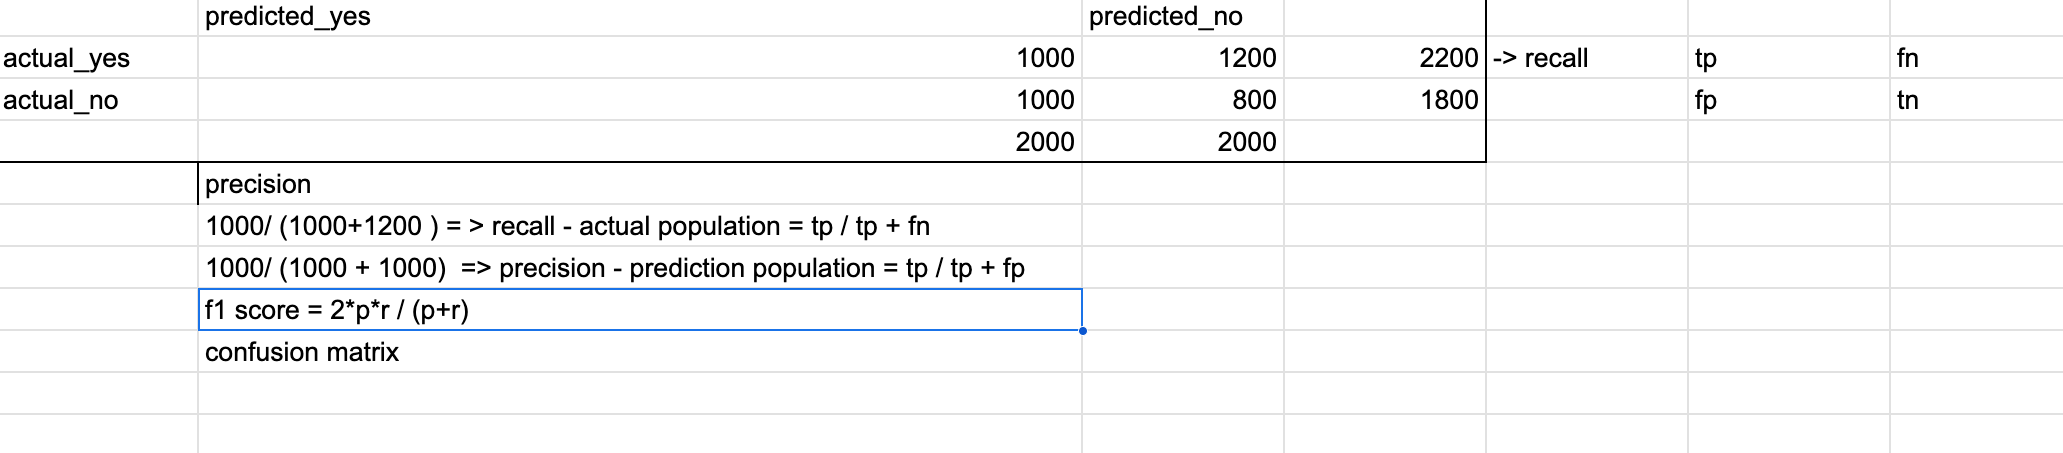